In [16]:
# 데이터 보기
import pandas as pd
import numpy as np
from glob import glob

# 이미지데이터 로딩
from PIL import Image
import cv2
from tqdm import tqdm


# 파일경로 설정
import os
import json

# Others
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

# Baseline
## Data Preprocess

In [17]:
data_path = '/Users/quhb2/Downloads/open'


train_path = data_path + '/train'
test_path = data_path + '/test'

new_image_directory = data_path + '/new_images'
new_train_image_directory = new_image_directory + '/train'
new_test_image_directory = new_image_directory + '/test'

action_information = pd.read_csv(data_path + '/action_information.csv')
sample_submission = pd.read_csv(data_path + '/sample_submission.csv')

In [62]:
def make_new_dir(path) : 
    if os.path.isdir(path) == False:
        os.makedirs(path)

In [57]:
make_new_dir(new_image_directory)
make_new_dir(new_train_image_directory)
make_new_dir(new_test_image_directory)

In [58]:
action_information.head()

,action,Label
0,우측에서 좌측으로,0
1,전방정지,1
2,전후방 동시정지,2
3,좌우측방 동시정지,3
4,좌측에서 우측으로,4


In [59]:
train_folders = sorted(glob(train_path + '/*'), key = lambda x : int(x.split('\\')[-1].replace('file_','')))
test_folders  = sorted(glob(test_path + '/*'), key = lambda x : int(x.split('\\')[-1].replace('file_','')))
train_folders[:5]

['/Users/quhb2/Downloads/open/train\\file_0',
 '/Users/quhb2/Downloads/open/train\\file_1',
 '/Users/quhb2/Downloads/open/train\\file_2',
 '/Users/quhb2/Downloads/open/train\\file_3',
 '/Users/quhb2/Downloads/open/train\\file_4']

In [60]:
train_folder = train_folders[0]

image_paths = sorted(glob(train_folder + '/*.jpg'), key = lambda x : int(x.split('\\')[-1].replace('.jpg','')))
json_path   = glob(train_folder + '/*.json')[0]

(2160, 3840, 3)


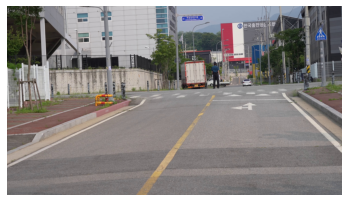

In [61]:
image_path = image_paths[0]
img = Image.open(image_path)
img_arr = np.array(img)
print(img_arr.shape)
plt.imshow(img_arr)
plt.axis('off')
plt.show()

In [62]:
js = json.load(open(json_path))

print("json keys             : ", js.keys())
print("json action info       : ",js.get('action'))
print("json sequence info       : ",js.get('sequence').keys())
print("json info keys : ",js.get('info').keys())

json keys             :  dict_keys(['action', 'sequence', 'info'])
json action info       :  5
json sequence info       :  dict_keys(['image_nums', '2d_pos', 'bounding_box', 'image_height', 'image_width'])
json info keys :  dict_keys(['actor_gender', 'actor_tall_range', 'actor_cloth', 's_height', 'lain_no', 's_dynamic', 's_weather', 's_season', 'direction'])


In [63]:
classes = pd.get_dummies(action_information[['Label']], columns = ['Label']).to_numpy()
classes

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [64]:
image = Image.open(image_path)
bounding_box = js.get('info').get('bounding_box')

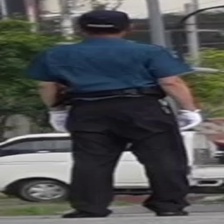

In [65]:
bounding_box = js.get('sequence').get('bounding_box')[0]
bounding_box = [float(x) for x in bounding_box]
image = Image.open(image_path)
image = image.crop(bounding_box) # left top right bottom
image = image.resize((224,224))
image

In [66]:
train_directories = np.array(sorted(glob(train_path + '/*'), key = lambda x : int(x.split('/')[-1].split('_')[-1])))

for train_directory in tqdm(train_directories, total = len(train_directories)) : 
    file_name = train_directory.split('\\')[-1]
    make_new_dir(new_train_image_directory + '/'+file_name)
    
    image_paths = sorted(glob(train_directory + '/*.jpg'), key = lambda x : int(x.split('\\')[-1].replace('.jpg','')))
    json_path   = glob(train_directory + '/*.json')[0]

    js = json.load(open(json_path))
    target = js.get('action')
    target = classes[target]
    bounding_boxes = js.get('sequence').get('bounding_box')
    bounding_boxes = [(float(a),float(b),float(c),float(d)) for a,b,c,d in bounding_boxes] # 실수형태로 변환, (left, top, right, bottom)

    for image_path, bounding_box in zip(image_paths, bounding_boxes) : 
        image = Image.open(image_path)
        image = image.crop(bounding_box) # left top right bottom
        image = image.resize((224,224))
        image.save(new_train_image_directory + image_path.split('/train')[1])        

  0%|                                                                                          | 0/142 [00:00<?, ?it/s]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  1%|▌                                                                                 | 1/142 [00:06<14:08,  6.02s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_0\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/o

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_1\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  1%|█▏                                                                                | 2/142 [00:11<13:38,  5.84s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  2%|█▋                                                                                | 3/142 [00:18<14:14,  6.14s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_2\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/o

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  3%|██▎                                                                               | 4/142 [00:24<14:29,  6.30s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_3\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_4\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  4%|██▉                                                                               | 5/142 [00:30<13:56,  6.10s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  4%|███▍                                                                              | 6/142 [00:36<14:02,  6.19s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_5\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloa

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  5%|████                                                                              | 7/142 [00:42<13:42,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_6\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/o

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\163.jpg


  6%|████▌                                                                             | 8/142 [00:48<13:34,  6.08s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_7\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/ope

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  6%|█████▏                                                                            | 9/142 [00:55<13:33,  6.11s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_8\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/o

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

  7%|█████▋                                                                           | 10/142 [01:01<13:34,  6.17s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_9\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downl

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

  8%|██████▎                                                                          | 11/142 [01:06<13:06,  6.00s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_10\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

  8%|██████▊                                                                          | 12/142 [01:12<12:58,  5.99s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_11\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

  9%|███████▍                                                                         | 13/142 [01:18<12:21,  5.75s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_12\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 10%|███████▉                                                                         | 14/142 [01:23<11:51,  5.56s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_13\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 11%|████████▌                                                                        | 15/142 [01:28<11:52,  5.61s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_14\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 11%|█████████▏                                                                       | 16/142 [01:34<11:59,  5.71s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_15\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 12%|█████████▋                                                                       | 17/142 [01:41<12:21,  5.93s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_16\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 13%|██████████▎                                                                      | 18/142 [01:46<11:50,  5.73s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\146.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_17\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 13%|██████████▊                                                                      | 19/142 [01:52<11:38,  5.68s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_18\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_19\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 14%|███████████▍                                                                     | 20/142 [01:58<11:57,  5.89s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 15%|███████████▉                                                                     | 21/142 [02:04<11:53,  5.90s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_20\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_21\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 15%|████████████▌                                                                    | 22/142 [02:09<11:32,  5.77s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\92.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 16%|█████████████                                                                    | 23/142 [02:15<11:30,  5.80s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_22\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_23\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 17%|█████████████▋                                                                   | 24/142 [02:22<12:00,  6.10s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 18%|██████████████▎                                                                  | 25/142 [02:28<12:00,  6.16s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_24\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 18%|██████████████▊                                                                  | 26/142 [02:36<12:33,  6.50s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_25\175.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 19%|███████████████▍                                                                 | 27/142 [02:43<12:41,  6.62s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\171.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_26\175.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 20%|███████████████▉                                                                 | 28/142 [02:49<12:16,  6.46s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_27\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 20%|████████████████▌                                                                | 29/142 [02:54<11:20,  6.03s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_28\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 21%|█████████████████                                                                | 30/142 [02:59<10:58,  5.88s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_29\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 22%|█████████████████▋                                                               | 31/142 [03:06<11:24,  6.16s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_30\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 23%|██████████████████▎                                                              | 32/142 [03:11<10:47,  5.89s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_31\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 23%|██████████████████▊                                                              | 33/142 [03:16<10:18,  5.68s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_32\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 24%|███████████████████▍                                                             | 34/142 [03:22<10:03,  5.59s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_33\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 25%|███████████████████▉                                                             | 35/142 [03:28<10:21,  5.80s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_34\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 25%|████████████████████▌                                                            | 36/142 [03:33<09:47,  5.54s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\146.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_35\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 26%|█████████████████████                                                            | 37/142 [03:38<09:15,  5.29s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_36\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 27%|█████████████████████▋                                                           | 38/142 [03:43<09:20,  5.38s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_37\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 27%|██████████████████████▏                                                          | 39/142 [03:49<09:31,  5.55s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_38\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 28%|██████████████████████▊                                                          | 40/142 [03:55<09:22,  5.51s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_39\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_40\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 29%|███████████████████████▍                                                         | 41/142 [04:00<09:17,  5.52s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 30%|███████████████████████▉                                                         | 42/142 [04:05<08:59,  5.40s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_41\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 30%|████████████████████████▌                                                        | 43/142 [04:11<09:00,  5.46s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_42\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_43\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 31%|█████████████████████████                                                        | 44/142 [04:17<09:05,  5.57s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_44\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 32%|█████████████████████████▋                                                       | 45/142 [04:24<09:51,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 32%|██████████████████████████▏                                                      | 46/142 [04:30<09:49,  6.15s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_45\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 33%|██████████████████████████▊                                                      | 47/142 [04:37<09:49,  6.20s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_46\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_47\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 34%|███████████████████████████▍                                                     | 48/142 [04:43<09:47,  6.26s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 35%|███████████████████████████▉                                                     | 49/142 [04:49<09:16,  5.99s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_48\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\158.jpg


 35%|████████████████████████████▌                                                    | 50/142 [04:55<09:28,  6.18s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_49\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 36%|█████████████████████████████                                                    | 51/142 [05:01<09:09,  6.04s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_50\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_51\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 37%|█████████████████████████████▋                                                   | 52/142 [05:09<09:52,  6.58s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\164.jpg


 37%|██████████████████████████████▏                                                  | 53/142 [05:15<09:47,  6.60s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_52\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 38%|██████████████████████████████▊                                                  | 54/142 [05:21<09:17,  6.33s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_53\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 39%|███████████████████████████████▎                                                 | 55/142 [05:27<08:49,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_54\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_55\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 39%|███████████████████████████████▉                                                 | 56/142 [05:33<09:02,  6.31s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 40%|████████████████████████████████▌                                                | 57/142 [05:40<09:08,  6.46s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_56\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 41%|█████████████████████████████████                                                | 58/142 [05:48<09:38,  6.89s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\192.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_57\193.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 42%|█████████████████████████████████▋                                               | 59/142 [05:55<09:25,  6.81s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_58\169.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_59\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 42%|██████████████████████████████████▏                                              | 60/142 [06:03<09:48,  7.18s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 43%|██████████████████████████████████▊                                              | 61/142 [06:09<09:14,  6.85s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_60\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 44%|███████████████████████████████████▎                                             | 62/142 [06:15<08:44,  6.56s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_61\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 44%|███████████████████████████████████▉                                             | 63/142 [06:20<08:18,  6.32s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\137.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_62\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 45%|████████████████████████████████████▌                                            | 64/142 [06:27<08:26,  6.49s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\169.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_63\170.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 46%|█████████████████████████████████████                                            | 65/142 [06:34<08:20,  6.49s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_64\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 46%|█████████████████████████████████████▋                                           | 66/142 [06:39<07:39,  6.05s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\136.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\137.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_65\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_66\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 47%|██████████████████████████████████████▏                                          | 67/142 [06:45<07:34,  6.05s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 48%|██████████████████████████████████████▊                                          | 68/142 [06:51<07:38,  6.19s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_67\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 49%|███████████████████████████████████████▎                                         | 69/142 [06:58<07:30,  6.18s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_68\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 49%|███████████████████████████████████████▉                                         | 70/142 [07:04<07:29,  6.24s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_69\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 50%|████████████████████████████████████████▌                                        | 71/142 [07:11<07:29,  6.33s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_70\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 51%|█████████████████████████████████████████                                        | 72/142 [07:16<07:06,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_71\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 51%|█████████████████████████████████████████▋                                       | 73/142 [07:22<06:59,  6.07s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_72\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 52%|██████████████████████████████████████████▏                                      | 74/142 [07:28<06:51,  6.06s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_73\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_74\159.jpg


 53%|██████████████████████████████████████████▊                                      | 75/142 [07:34<06:47,  6.08s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 54%|███████████████████████████████████████████▎                                     | 76/142 [07:40<06:28,  5.89s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_75\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 54%|███████████████████████████████████████████▉                                     | 77/142 [07:45<06:21,  5.87s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_76\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 55%|████████████████████████████████████████████▍                                    | 78/142 [07:51<06:14,  5.85s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_77\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 56%|█████████████████████████████████████████████                                    | 79/142 [07:58<06:19,  6.03s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_78\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 56%|█████████████████████████████████████████████▋                                   | 80/142 [08:04<06:12,  6.00s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_79\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 57%|██████████████████████████████████████████████▏                                  | 81/142 [08:10<06:08,  6.04s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_80\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\167.jpg


 58%|██████████████████████████████████████████████▊                                  | 82/142 [08:16<06:09,  6.15s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\169.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\170.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\171.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_81\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 58%|███████████████████████████████████████████████▎                                 | 83/142 [08:22<05:54,  6.01s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\146.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_82\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 59%|███████████████████████████████████████████████▉                                 | 84/142 [08:28<05:51,  6.07s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_83\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\169.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\170.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\171.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 60%|████████████████████████████████████████████████▍                                | 85/142 [08:35<06:02,  6.37s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\177.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\178.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_84\179.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\167.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\168.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\169.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 61%|█████████████████████████████████████████████████                                | 86/142 [08:42<06:00,  6.43s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_85\179.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 61%|█████████████████████████████████████████████████▋                               | 87/142 [08:48<05:51,  6.38s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_86\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 62%|██████████████████████████████████████████████████▏                              | 88/142 [08:54<05:41,  6.33s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_87\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_88\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 63%|██████████████████████████████████████████████████▊                              | 89/142 [09:00<05:26,  6.16s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downlo

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 63%|███████████████████████████████████████████████████▎                             | 90/142 [09:06<05:13,  6.02s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_89\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 64%|███████████████████████████████████████████████████▉                             | 91/142 [09:12<05:09,  6.07s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_90\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 65%|████████████████████████████████████████████████████▍                            | 92/142 [09:18<05:05,  6.11s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_91\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 65%|█████████████████████████████████████████████████████                            | 93/142 [09:24<04:54,  6.00s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_92\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 66%|█████████████████████████████████████████████████████▌                           | 94/142 [09:30<04:46,  5.97s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_93\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 67%|██████████████████████████████████████████████████████▏                          | 95/142 [09:36<04:47,  6.11s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_94\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 68%|██████████████████████████████████████████████████████▊                          | 96/142 [09:43<04:50,  6.31s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\170.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\171.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\172.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_95\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 68%|███████████████████████████████████████████████████████▎                         | 97/142 [09:50<04:48,  6.42s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_96\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Down

/Users/quhb2/Downloads/open/new_images/train\file_97\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\91

 69%|███████████████████████████████████████████████████████▉                         | 98/142 [09:56<04:40,  6.37s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_97\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Do

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 70%|████████████████████████████████████████████████████████▍                        | 99/142 [10:02<04:25,  6.18s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_98\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/qu

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

 70%|████████████████████████████████████████████████████████▎                       | 100/142 [10:08<04:17,  6.13s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_99\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\161.jpg


 71%|████████████████████████████████████████████████████████▉                       | 101/142 [10:14<04:16,  6.25s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_100\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\160.jpg
/Users/quhb2/Downloads/open/new_image

 72%|█████████████████████████████████████████████████████████▍                      | 102/142 [10:22<04:24,  6.61s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\173.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\175.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\176.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_101\177.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 73%|██████████████████████████████████████████████████████████                      | 103/142 [10:28<04:09,  6.41s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_102\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 73%|██████████████████████████████████████████████████████████▌                     | 104/142 [10:33<03:55,  6.19s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_103\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\162.jpg
/Users/quhb2/Downloads/open/new_image

 74%|███████████████████████████████████████████████████████████▏                    | 105/142 [10:40<03:56,  6.38s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\177.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_104\178.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\166.jpg
/Users/quhb2/Downloads/open/new_image

 75%|███████████████████████████████████████████████████████████▋                    | 106/142 [10:47<03:58,  6.64s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\175.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\176.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\177.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_105\178.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\161.jpg


 75%|████████████████████████████████████████████████████████████▎                   | 107/142 [10:53<03:46,  6.48s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_106\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_107\167.jpg
/Users/quhb2/Downloads/open/new_image

 76%|████████████████████████████████████████████████████████████▊                   | 108/142 [11:00<03:45,  6.62s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\91.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 77%|█████████████████████████████████████████████████████████████▍                  | 109/142 [11:07<03:34,  6.50s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_108\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\159.jpg


 77%|█████████████████████████████████████████████████████████████▉                  | 110/142 [11:13<03:26,  6.44s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_109\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_110\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 78%|██████████████████████████████████████████████████████████████▌                 | 111/142 [11:19<03:16,  6.35s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 79%|███████████████████████████████████████████████████████████████                 | 112/142 [11:25<03:09,  6.33s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_111\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 80%|███████████████████████████████████████████████████████████████▋                | 113/142 [11:31<02:57,  6.12s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_112\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 80%|████████████████████████████████████████████████████████████████▏               | 114/142 [11:36<02:45,  5.90s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_113\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\90.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 81%|████████████████████████████████████████████████████████████████▊               | 115/142 [11:42<02:40,  5.94s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_114\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 82%|█████████████████████████████████████████████████████████████████▎              | 116/142 [11:48<02:33,  5.91s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_115\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 82%|█████████████████████████████████████████████████████████████████▉              | 117/142 [11:53<02:22,  5.70s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_116\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 83%|██████████████████████████████████████████████████████████████████▍             | 118/142 [11:59<02:14,  5.60s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_117\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 84%|███████████████████████████████████████████████████████████████████             | 119/142 [12:04<02:07,  5.55s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_118\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\167.jpg
/Users/quhb2/Downloads/open/new_image

 85%|███████████████████████████████████████████████████████████████████▌            | 120/142 [12:11<02:11,  5.98s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\184.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\185.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\186.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_119\187.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\164.jpg
/Users/quhb2/Downloads/open/new_image

 85%|████████████████████████████████████████████████████████████████████▏           | 121/142 [12:19<02:15,  6.45s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\184.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\185.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\186.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_120\187.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 86%|████████████████████████████████████████████████████████████████████▋           | 122/142 [12:25<02:08,  6.42s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_121\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 87%|█████████████████████████████████████████████████████████████████████▎          | 123/142 [12:32<02:02,  6.45s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_122\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 87%|█████████████████████████████████████████████████████████████████████▊          | 124/142 [12:38<01:56,  6.46s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\151.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\152.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\153.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_123\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 88%|██████████████████████████████████████████████████████████████████████▍         | 125/142 [12:45<01:50,  6.52s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_124\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 89%|██████████████████████████████████████████████████████████████████████▉         | 126/142 [12:51<01:41,  6.37s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_125\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_126\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 89%|███████████████████████████████████████████████████████████████████████▌        | 127/142 [12:57<01:35,  6.36s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\8.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quh

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 90%|████████████████████████████████████████████████████████████████████████        | 128/142 [13:04<01:29,  6.41s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_127\150.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 91%|████████████████████████████████████████████████████████████████████████▋       | 129/142 [13:09<01:20,  6.21s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_128\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 92%|█████████████████████████████████████████████████████████████████████████▏      | 130/142 [13:15<01:14,  6.17s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\142.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\143.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_129\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 92%|█████████████████████████████████████████████████████████████████████████▊      | 131/142 [13:21<01:06,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_130\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 93%|██████████████████████████████████████████████████████████████████████████▎     | 132/142 [13:26<00:58,  5.80s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\136.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\137.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\138.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\139.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\140.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_131\141.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\2.jpg
/Users/quhb2/Downloads/open/new_images/trai

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 94%|██████████████████████████████████████████████████████████████████████████▉     | 133/142 [13:32<00:50,  5.59s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\146.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_132\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/U

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\165.jpg
/Users/quhb2/Downloads/open/new_image

 94%|███████████████████████████████████████████████████████████████████████████▍    | 134/142 [13:39<00:48,  6.09s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_133\174.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 95%|████████████████████████████████████████████████████████████████████████████    | 135/142 [13:44<00:41,  5.89s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_134\144.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\154.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\155.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\156.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\157.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\158.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\162.jpg
/Users/quhb2/Downloads/open/new_image

 96%|████████████████████████████████████████████████████████████████████████████▌   | 136/142 [13:52<00:38,  6.39s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_135\182.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\165.jpg


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 137/142 [13:58<00:31,  6.35s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_136\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\7.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/q

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\159.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\160.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\161.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\162.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\163.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\164.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\165.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\166.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\167.jpg
/Users/quhb2/Downloads/open/new_image

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 138/142 [14:05<00:26,  6.60s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\180.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\181.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_137\182.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Use

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 98%|██████████████████████████████████████████████████████████████████████████████▎ | 139/142 [14:11<00:19,  6.35s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\145.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\146.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_138\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\3.jpg
/Users/quhb2/Downloads/open/new_images/train


/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\73.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\74.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\75.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 99%|██████████████████████████████████████████████████████████████████████████████▊ | 140/142 [14:17<00:12,  6.28s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_139\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\6.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\76.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\77.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\78.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\79.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\80.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/

 99%|███████████████████████████████████████████████████████████████████████████████▍| 141/142 [14:23<00:06,  6.13s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\147.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\148.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_140\149.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\0.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\1.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\2.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\3.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\4.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\5.jpg
/Users/quhb2/Downloads/open/new_images/train
/Use

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\81.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\82.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\83.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\84.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\85.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\86.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\87.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\88.jpg
/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\89.jpg
/Users/quhb2/Downloads/open/new_images/train
/

100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [14:28<00:00,  6.12s/it]

/Users/quhb2/Downloads/open/new_images/train
/Users/quhb2/Downloads/open/new_images/train\file_141\147.jpg


In [67]:
test_directories = np.array(sorted(glob(test_path + '/*'), key = lambda x : int(x.split('/')[-1].split('_')[-1])))

for test_directory in tqdm(test_directories, total = len(test_directories)) : 
    file_name = test_directory.split('\\')[-1]
    make_new_dir(new_test_image_directory + '/'+file_name)
    
    image_paths = sorted(glob(test_directory + '/*.jpg'), key = lambda x : int(x.split('\\')[-1].replace('.jpg','')))
    json_path   = glob(test_directory + '/*.json')[0]

    js = json.load(open(json_path))
    target = js.get('action')
    target = classes[target]
    bounding_boxes = js.get('sequence').get('bounding_box')
    bounding_boxes = [(float(a),float(b),float(c),float(d)) for a,b,c,d in bounding_boxes] # 실수형태로 변환, (left, top, right, bottom)

    for image_path, bounding_box in zip(image_paths, bounding_boxes) : 
        image = Image.open(image_path)
        image = image.crop(bounding_box) # left top right bottom
        image = image.resize((224,224))
        image.save(new_test_image_directory + image_path.split('/test')[1])        

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [04:32<00:00,  6.05s/it]


In [85]:
new_train_image_directory

'/Users/quhb2/Downloads/open/new_images/train'

In [ ]:
json_path = glob(test_directory+"/*.json")[0]
js = json.load(open(json_path))
target = js.get('action')
label = classes[target]
print(label)

In [94]:
classes = pd.get_dummies(action_information[['Label']], columns = ['Label']).to_numpy()


In [103]:
labels = []
cnt = 0
for train_directory in tqdm(train_directories) :

    json_path = glob(train_directory+"/*.json")[0]
    js = json.load(open(json_path))
    target = js.get('action')
    print(target)
    labels.append(classes[target])
    
    file_name = train_directory.split('\\')[-1]
    with open(new_train_image_directory +'/'+file_name+'/label.txt', 'w') as f :
        f.write(f"{target}")

 29%|███████████████████████                                                         | 41/142 [00:00<00:00, 405.62it/s]

5
3
3
3
2
5
5
3
2
2
3
0
0
0
0
0
0
0
4
4
4
4
4
1
1
1
1
1
1
1
1
5
5
0
5
5
5
3
3
3
2
2
2
2
0
0
0
0
0
4
4
4
4
4
4
1
1
1
1
1
5
5
3
3
3
3
3
2
5
5
5
5
5
5
5
5
3
3


100%|███████████████████████████████████████████████████████████████████████████████| 142/142 [00:00<00:00, 395.91it/s]

3
3
2
1
5
5
2
2
0
0
0
0
4
0
0
4
4
4
4
0
4
4
1
4
5
3
3
3
3
2
2
2
2
1
1
1
1
5
4
4
4
1
1
0
0
0
0
3
2
2
2
2
2
2
4
4
5
2
2
2
1
1
1
5


# dataset parsing

In [1]:
import torch
from torch.utils.data import Dataset

import albumentations as A
from sklearn.model_selection import train_test_split, StratifiedKFold

import cv2
import os
import numpy as np
from glob import glob

In [2]:
class TrainDataset(Dataset):
    def __init__(self, img_list, label_list, transforms=None):
        self.img_list = img_list
        self.label_list = label_list
        self.transforms = transforms

    def __getitem__(self, idx):
        img = cv2.imread(self.img_list[idx], cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transforms :
            img = self.transforms(image=img)["image"]

        img = img.transpose(2, 0, 1)
        label = self.label_list[idx]

        img = torch.tensor(img, dtype=torch.float)
        label = torch.tensor(label, dtype=torch.long)

        return img, label

    def __len__(self):
        assert len(self.img_list) == len(self.label_list)
        return len(self.img_list)

In [3]:
class DataParser() :
    def __init__(self, data_path, random_seed, classes=5):
        self.img_list, self.label_list = self.get_data(data_path, classes)
        self.random_seed = random_seed
        
    def one_hot(self, labels, classes) :
        one_hot = [0] * classes 
        one_hot[labels-1] = 1
        return one_hot


    def get_data(self, data_path, classes):

        folder_list = os.listdir(data_path)

        class_path_list = [data_path+'/'+folder for folder in folder_list]

        img_list = []
        label_list = []
        for file in class_path_list :
            imgs = sorted(glob(file+'\\*.jpg'), key = lambda x : int(x.split('\\')[-1].replace('.jpg','')))
            img_list.extend(imgs)
            with open(data_path+'/'+file.split('/')[-1]+'/label.txt','r') as f :
                label = f.readline()
#             label_list.extend([self.one_hot(int(label), classes)]* len(imgs))
            label_list.extend([int(label)]* len(imgs))
#         print(label_list)
        return img_list, label_list


    def get_transforms(self, train=True):
        if train :
            transforms = A.Compose([
                A.Resize(224,224),
#                 A.Rotate(),
#                 A.HorizontalFlip(),
                A.ColorJitter(),
                A.Normalize()
            ])
        else :
            transforms = A.Compose([
                A.Resize(224, 224),
                A.Normalize()
            ])

        return transforms
    
    
    def DatasetParsing(self, fold_train=None, fold_valid=None):
        if fold_train is None :
            train_imgs, valid_imgs, train_labels, valid_labels = train_test_split(self.img_list,
                                                                                  self.label_list,
                                                                                  train_size=0.8,
                                                                                  shuffle=True,
                                                                                  random_state=self.random_seed,
                                                                                  stratify=self.label_list)
        else :
            train_imgs, train_labels = self.get_fold_data(fold_train)
            valid_imgs, valid_labels = self.get_fold_data(fold_valid)

        train_transforms = self.get_transforms()
        valid_transforms = self.get_transforms(train=False)

        train_dataset = TrainDataset(img_list=train_imgs, label_list=train_labels, transforms=train_transforms)
        valid_dataset = TrainDataset(img_list=valid_imgs, label_list=valid_labels, transforms=valid_transforms)

        return train_dataset, valid_dataset

# Train

In [4]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader

from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import numpy as np
from easydict import EasyDict
import timm
import random

In [5]:
class Train():
    def __init__(self, args):
        self.model_name = args.model_name
        self.export = args.export

        self.epoch = args.epoch
        self.batch_size = args.batch_size
        self.lr = args.learning_rate

        self.k_fold_n = args.k_fold_n
        self.early_stop = args.early_stop

        self.train_path = args.train_path
        self.test_path = args.test_path
        self.num_classes = args.num_classes

        self.random_seed = args.random_seed
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # self.CUDA_NUMPY_SETTING(random_seed=args.random_seed)

    def create_model(self, model_name, num_classes):
        model = timm.create_model(model_name,pretrained=True, num_classes=num_classes).to(device=self.device)
        return model


    def CUDA_NUMPY_SETTING(self, random_seed=11):
        torch.manual_seed(random_seed)
        torch.manual_seed_all(random_seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

        np.random.seed(random_seed)
        random.seed(random_seed)

        print("==" * 30)
        print("USING CUDA is ",torch.cuda.is_available())
        print("DETECTED GPU NUMNER : ", torch.cuda.current_device())
        print("Using ", torch.cuda.device_count()," GPUs")
        for i in range(torch.cuda.device_count()) :
            print("GPU name is ", torch.cuda.get_device_name(i))
        print("==" * 30)

    def calc_ACC(self, pred, label):
        preds = pred.argmax(dim=-1)
        comp_list = (preds==label).cpu().tolist()

        cnt = 0
        for i in comp_list :
            if i == True : cnt += 1

        return cnt / len(preds)


    def model(self,datasetWeights=None):
        model = self.create_model(self.model_name, num_classes=self.num_classes)
        criterion = nn.CrossEntropyLoss(weight=(datasetWeights).to(device=self.device, dtype=torch.float)
                                        if datasetWeights is not None
                                        else None)
        optimizer = AdamW(params=model.parameters(), lr=self.lr)
        scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=0)

        return model, criterion, optimizer, scheduler


    def run(self, train_loader, valid_loader, weights):
        results = {
            'train_acc': [],
            'train_loss': [],
            'valid_loss': [],
            'valid_acc': [],
            'valid_f1': []
        }

        best_snapshot = {
            'best_epoch': 0,
            'best_f1': 0,
            'best_model': None
        }

        early_stop_cout = 0

        model, criterion, optimizer, scheduler = self.model(weights)

        for E in range(1, self.epoch + 1):
            model.train()

            iter_results = {
                'train_acc': [],
                'train_loss': [],
                'valid_loss': [],
                'valid_acc': [],
                'valid_f1': []
            }

            # iter
            for iter, (batch_img, batch_label) in enumerate(train_loader, start=1):
                imgs = batch_img.to(device=self.device, dtype=torch.float)
                labels = batch_label.to(device=self.device)
                
#                 print(imgs.shape)
#                 print(labels.shape)
#                 print(labels)
                
                optimizer.zero_grad()

                pred = model(imgs)
                loss = criterion(pred, labels)

                loss.backward()
                optimizer.step()

                iter_results['train_acc'].append(self.calc_ACC(pred, labels))
                iter_results['train_loss'].append(loss.cpu().item())

                print(f"Epoch [{E} / {self.epoch}]      Iter [{iter} / {len(train_loader)}]", end="\r")

            # eval
            with torch.no_grad():
                for iter, (batch_img, batch_label) in enumerate(valid_loader, start=1):
                    model.eval()

                    imgs = batch_img.to(device=self.device, dtype=torch.float)
                    labels = batch_label.to(device=self.device)

                    val_pred = model(imgs)
                    val_pred_argmax = val_pred.argmax(dim=-1)
                    val_loss = criterion(val_pred, labels)

                    iter_results['valid_acc'].append(self.calc_ACC(val_pred, labels))
                    iter_results['valid_loss'].append(val_loss.cpu().item())
                    iter_results['valid_f1'].append(f1_score(y_true=labels.cpu().numpy(),
                                                             y_pred=val_pred_argmax.cpu().numpy(),
                                                             average="macro"))

                    print(f"Epoch [{E} / {self.epoch}]      valid_Iter [{iter} / {len(valid_loader)}]", end="\r")

            # print(iter_results['valid_acc'])
            # print(type(iter_results['valid_acc']))
            results['train_acc'].append(np.mean(iter_results['train_acc']) * 100)
            results['train_loss'].append(np.mean(iter_results['train_loss']))
            results['valid_acc'].append(np.mean(iter_results['valid_acc']) * 100)
            results['valid_loss'].append(np.mean(iter_results['valid_loss']))
            results['valid_f1'].append(np.mean(iter_results['valid_f1']))

            scheduler.step()

            print(
                f"[Epoch {E} / {self.epoch}] "
                f"train_acc : {results['train_acc'][-1]:.4f} | "
                f"train_loss : {results['train_loss'][-1]:.4f} | "
                f"valid_acc : {results['valid_acc'][-1]:.4f} | "
                f"valid_loss : {results['valid_loss'][-1]:.4f} | "
                f"valid_f1 : {results['valid_f1'][-1]:.4f}"
            )

            if results['valid_f1'][-1] > best_snapshot['best_f1']:
                best_snapshot['best_f1'] = results['valid_f1'][-1]
                best_snapshot['best_model'] = model
                best_snapshot['best_epoch'] = E
                early_stop_cout = 0

            else:
                early_stop_cout += 1
                print(f"early_stop_couter : {early_stop_cout} / {self.early_stop}")

            if early_stop_cout >= self.early_stop:
                print()
                print("*" * 20)
                print("!! EARLY STOP !!")
                print("*" * 20)
                print()
                break

        return results, best_snapshot

    def train(self):

        classes = self.num_classes

        Datasets = DataParser(self.train_path, self.random_seed, classes)

        if self.k_fold_n == False :

            train_dataset, valid_dataset = Datasets.DatasetParsing()

            train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
            valid_loader = DataLoader(valid_dataset, batch_size=self.batch_size, shuffle=True)

            results, best_snapshot = self.run(train_loader, valid_loader, None)

            return results, best_snapshot

        else :
            print(f"Training Start [ {self.k_fold_n} ] times")

            # StratifiedKFold가 class 간의  balance를 맞춰주기 때문에 weights는 필요 없음
            kfold = StratifiedKFold(n_splits=self.k_fold_n, random_state=self.random_seed, shuffle=True)

            # kfold_result = {"results": [], "best_snapshot":[]}
            kfold_result = []
            for k, (fold_train, fold_valid) in enumerate(kfold.split(Datasets.img_list, Datasets.label_list), 1) :

                fold_train_dataset, fold_valid_dataset = Datasets.DatasetParsing(fold_train, fold_valid)

                fold_train_loader = DataLoader(fold_train_dataset, batch_size=self.batch_size, shuffle=True)
                fold_valid_loader = DataLoader(fold_valid_dataset, batch_size=self.batch_size, shuffle=True)

                results, best_snapshot = self.run(fold_train_loader, fold_valid_loader, None)

                # kfold_result['results'].append(results) # >> ?? 굳이 저장을 해야하나?
                kfold_result.append(best_snapshot)

                print(f"Fold [{k} / {self.k_fold_n}]  Best-F1 [{kfold_result[k-1]['best_f1']}]")

            return kfold_result


In [6]:
def make_new_dir(path) : 
    if os.path.isdir(path) == False:
        os.makedirs(path)

In [7]:


config={
    'model_name' : 'vit_base_patch16_224',
    'export' : './data/model',
    'batch_size' : 16,
    'epoch' : 15,
    'k_fold_n': False,
    'learning_rate' : 1e-4,
    'early_stop' : 5,
    'random_seed' : 11,
    'train_path' : '/Users/quhb2/Downloads/open/new_images/train',
    'test_path' : '/Users/quhb2/Downloads/open/new_images/test',
    'num_classes' : 6
}

args = EasyDict(config)

In [8]:
print("="*20)
print(args)
print("=" * 20)

make_new_dir(args.export)

training = Train(args)

if args.k_fold_n == False :
    results, best_snapshot = training.train()
    torch.save(best_snapshot['best_model'],
               args.export + '/' + str(best_snapshot['best_f1']) + '_' + str(best_snapshot['best_epoch']) + 'E_best_model.pt')

else :
    kfold_best_snapshot = training.train()
    # print(kfold_best_snapshot)
    for idx, bs in enumerate(kfold_best_snapshot) :
        torch.save(bs['best_model'],
               args.export + '/Kfold_' + str(idx) +'_'+ str(bs['best_f1']) + '_' + str(bs['best_epoch']) + 'E_best_model.pt')


# print(results)

print("DONE")

{'model_name': 'vit_base_patch16_224', 'export': './data/model', 'batch_size': 16, 'epoch': 15, 'k_fold_n': False, 'learning_rate': 0.0001, 'early_stop': 5, 'random_seed': 11, 'train_path': '/Users/quhb2/Downloads/open/new_images/train', 'test_path': '/Users/quhb2/Downloads/open/new_images/test', 'num_classes': 6}
[Epoch 1 / 15] train_acc : 79.2417 | train_loss : 0.5574 | valid_acc : 94.8591 | valid_loss : 0.1616 | valid_f1 : 0.9318
[Epoch 2 / 15] train_acc : 97.2981 | train_loss : 0.0835 | valid_acc : 98.2239 | valid_loss : 0.0521 | valid_f1 : 0.9758
[Epoch 3 / 15] train_acc : 98.4530 | train_loss : 0.0491 | valid_acc : 98.1115 | valid_loss : 0.0743 | valid_f1 : 0.9766
[Epoch 4 / 15] train_acc : 98.8749 | train_loss : 0.0351 | valid_acc : 99.4155 | valid_loss : 0.0157 | valid_f1 : 0.9928
[Epoch 5 / 15] train_acc : 99.3981 | train_loss : 0.0175 | valid_acc : 98.9658 | valid_loss : 0.0409 | valid_f1 : 0.9856
early_stop_couter : 1 / 5
[Epoch 6 / 15] train_acc : 99.6175 | train_loss : 0.0

In [3]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import albumentations as A
import torch.nn.functional as F
import gc

from sklearn.model_selection import train_test_split, StratifiedKFold

import cv2
import os
import numpy as np
from glob import glob
from tqdm import tqdm

class TestDataset(Dataset) :
    def __init__(self, img_list, transforms=None):
        self.img_list = img_list
        self.transforms = transforms

    def __getitem__(self, idx):
        img = cv2.imread(self.img_list[idx], cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transforms :
            img = self.transforms(image=img)["image"]

        img = img.transpose(2, 0, 1)

        img = torch.tensor(img, dtype=torch.float)

        return img

    def __len__(self):
        return len(self.img_list)

In [4]:
model = torch.load('./data/model/0.9987362490959613_10E_best_model.pt').eval()

In [7]:
from tqdm import tqdm
import albumentations as A
import torch.nn.functional as F
import gc



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transforms = A.Compose([
#     A.Resize(224, 224),
    A.Normalize()
])

new_image_directory = '/Users/quhb2/Downloads/open/new_images/'
new_test_image_directory = new_image_directory + '/test'
new_test_image_directories = sorted(glob(new_test_image_directory + '/*'), key = lambda x : int(x.split('file_')[-1]))

results = []
for new_test_image_directory in new_test_image_directories :
    
    torch.cuda.empty_cache()
    gc.collect()
    
    image_paths = sorted(glob(new_test_image_directory + '/*.jpg'), key = lambda x : int(x.split('\\')[-1].replace('.jpg','')))
    test_dataset = TestDataset(img_list=image_paths, transforms=transforms)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    
    predictions = []
    for test_img in tqdm(test_loader):
        test_img = test_img.to(device=device)
        preds = model(test_img)
        preds = F.softmax(preds.data.cpu(), dim=1)[0]
        predictions.append(preds.numpy())
    print(np.mean(np.array(predictions), axis=0)) 
    results.append(np.mean(np.array(predictions), axis=0))

print(results)

100%|████████████████████████████████████████████████████████████████████████████████| 155/155 [00:02<00:00, 69.08it/s]


[2.5147120e-02 9.4637857e-05 1.1915383e-02 7.5348988e-02 5.2631121e-02
 8.3486307e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 154/154 [00:02<00:00, 71.69it/s]


[7.9566642e-04 4.9105856e-05 1.3163539e-03 1.8597804e-03 9.5678166e-05
 9.9588370e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 69.55it/s]


[5.0414982e-03 1.1028730e-02 4.8261248e-02 8.5794204e-01 5.0910974e-05
 7.7675745e-02]


100%|████████████████████████████████████████████████████████████████████████████████| 165/165 [00:02<00:00, 71.46it/s]


[4.8356343e-02 5.9413753e-05 6.8510495e-02 5.7543504e-01 1.1897946e-03
 3.0644917e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 69.60it/s]


[9.4126487e-01 8.5475445e-03 6.4183137e-04 3.4431080e-04 3.2329732e-03
 4.5968350e-02]


100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [00:02<00:00, 64.27it/s]


[9.8651463e-01 3.9901128e-03 3.8658245e-06 1.0436295e-05 9.3741063e-03
 1.0699265e-04]


100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:02<00:00, 65.63it/s]


[5.4471052e-01 4.0980330e-01 6.4995415e-06 3.8944887e-05 4.5122031e-02
 3.1862233e-04]


100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:02<00:00, 69.75it/s]


[7.0313200e-02 2.2901413e-03 5.2184538e-07 1.3797040e-04 9.2723686e-01
 2.1539769e-05]


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [00:02<00:00, 70.15it/s]


[6.8282887e-02 5.3558254e-01 1.1495134e-04 4.8297830e-03 2.2987084e-01
 1.6131896e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 146/146 [00:02<00:00, 66.66it/s]


[8.6504780e-03 8.3364308e-04 1.0299492e-04 1.3780447e-05 9.9139270e-06
 9.9038959e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [00:02<00:00, 69.21it/s]


[1.0513595e-02 1.3744774e-03 3.3409963e-06 3.0583139e-03 2.9993473e-04
 9.8475033e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:02<00:00, 68.43it/s]


[0.09276234 0.00229037 0.06867874 0.02412737 0.04767935 0.7644619 ]


100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:02<00:00, 69.07it/s]


[0.06339427 0.00073137 0.2832315  0.25247937 0.09103946 0.3091242 ]


100%|████████████████████████████████████████████████████████████████████████████████| 155/155 [00:02<00:00, 68.94it/s]


[0.3834936  0.02482966 0.20606405 0.08351792 0.2231955  0.07889941]


100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:02<00:00, 70.00it/s]


[5.6019094e-02 1.1111705e-05 1.6491359e-07 3.8832215e-07 9.4396877e-01
 4.7346816e-07]


100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:01<00:00, 71.07it/s]


[3.6937311e-02 8.5130048e-01 6.6184184e-06 2.7848372e-02 8.2657129e-02
 1.2503278e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 146/146 [00:02<00:00, 71.74it/s]


[1.6233119e-01 2.0279120e-04 8.5577717e-08 1.1564364e-01 7.2046965e-01
 1.3525714e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 194/194 [00:02<00:00, 71.64it/s]


[2.2648619e-06 1.0490653e-06 2.5407343e-07 1.6755599e-06 9.9999541e-01
 1.1906204e-07]


100%|████████████████████████████████████████████████████████████████████████████████| 141/141 [00:01<00:00, 72.12it/s]


[8.6402996e-03 1.0890273e-03 4.4142274e-07 9.8429447e-01 5.2155852e-03
 7.6039904e-04]


100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:01<00:00, 71.39it/s]


[3.4991351e-01 6.0311617e-05 1.2667308e-05 4.6053216e-02 3.7233648e-01
 2.3162396e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:02<00:00, 70.69it/s]


[0.03042862 0.32142738 0.10122094 0.22866432 0.31786522 0.00039362]


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:02<00:00, 69.23it/s]


[3.0325254e-04 3.6005771e-05 9.7798547e-06 5.4052018e-02 9.7805469e-06
 9.4558907e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 155/155 [00:02<00:00, 64.37it/s]


[1.6384263e-04 4.6257378e-06 1.3272909e-05 3.7038836e-01 3.4435030e-05
 6.2939554e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 141/141 [00:02<00:00, 64.53it/s]


[8.8697707e-06 2.1766630e-06 3.6542340e-06 7.3332017e-06 6.9534057e-04
 9.9928272e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:02<00:00, 68.36it/s]


[5.2406412e-04 2.0542613e-05 9.6606366e-02 5.8038584e-03 2.3116779e-02
 8.7392849e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 175/175 [00:02<00:00, 66.14it/s]


[0.00206962 0.00123018 0.26087892 0.1619154  0.00144323 0.57246256]


100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:02<00:00, 68.43it/s]


[9.9873251e-01 2.0547876e-07 1.7421690e-06 2.5144805e-06 1.5684558e-05
 1.2476152e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:02<00:00, 66.70it/s]


[3.5254580e-01 1.7884483e-04 3.6129190e-05 5.0255593e-02 1.5724315e-01
 4.3974069e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 145/145 [00:02<00:00, 67.57it/s]


[3.5165742e-01 1.3968430e-06 3.8647654e-06 1.5655643e-06 6.4831388e-01
 2.1912801e-05]


100%|████████████████████████████████████████████████████████████████████████████████| 178/178 [00:02<00:00, 67.58it/s]


[8.7241369e-01 2.7676853e-03 7.2748272e-04 1.4724249e-05 9.9285349e-02
 2.4791112e-02]


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 66.36it/s]


[9.8758906e-01 1.5726443e-04 9.4776893e-05 2.9508466e-05 1.1817729e-02
 3.1213969e-04]


100%|████████████████████████████████████████████████████████████████████████████████| 164/164 [00:02<00:00, 67.98it/s]


[1.7834673e-04 2.5388386e-05 2.7547879e-03 7.9516798e-01 5.9236999e-04
 2.0128113e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [00:02<00:00, 68.77it/s]


[0.00088816 0.70714986 0.08000256 0.00498178 0.20556675 0.00141091]


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:02<00:00, 69.96it/s]


[6.1471358e-02 2.8164718e-01 4.4449000e-05 4.9977962e-02 6.0475194e-01
 2.1069993e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [00:02<00:00, 70.10it/s]


[0.00153309 0.02793585 0.01228518 0.00909587 0.51617944 0.43297064]


100%|████████████████████████████████████████████████████████████████████████████████| 141/141 [00:02<00:00, 69.73it/s]


[1.7203715e-04 1.8094951e-01 6.0107887e-01 1.9123445e-04 2.0517498e-01
 1.2433621e-02]


100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:02<00:00, 70.79it/s]


[1.8127550e-03 8.5582799e-01 2.1670818e-04 2.3247976e-02 1.0144913e-01
 1.7445317e-02]


100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [00:02<00:00, 70.02it/s]


[6.0693570e-04 6.5027881e-01 7.3233078e-04 4.9637823e-04 3.4254357e-01
 5.3421143e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:02<00:00, 70.85it/s]


[0.0614276  0.2421475  0.36144868 0.00375341 0.00590822 0.3253146 ]


100%|████████████████████████████████████████████████████████████████████████████████| 174/174 [00:02<00:00, 70.53it/s]


[2.0406521e-06 9.9994719e-01 3.5000340e-07 3.4013583e-06 2.7731176e-05
 1.9308423e-05]


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:02<00:00, 65.82it/s]


[0.03519827 0.02174845 0.04618985 0.10593271 0.00270186 0.788229  ]


100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:02<00:00, 64.49it/s]


[1.09155744e-01 3.01129749e-05 2.26314917e-01 9.76182707e-03
 4.51608590e-04 6.54285789e-01]


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:02<00:00, 63.28it/s]


[1.4422499e-04 1.6112528e-05 4.0985883e-06 5.8567290e-05 9.9861991e-01
 1.1575517e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 177/177 [00:02<00:00, 65.75it/s]


[6.9697471e-08 1.1078489e-08 3.1798933e-08 1.6238570e-06 9.9679697e-01
 3.2016132e-03]


100%|████████████████████████████████████████████████████████████████████████████████| 169/169 [00:02<00:00, 66.67it/s]

[2.2653601e-05 4.1238829e-05 9.9987823e-01 8.5606907e-06 6.3600260e-06
 4.3389329e-05]
[array([2.5147120e-02, 9.4637857e-05, 1.1915383e-02, 7.5348988e-02,
       5.2631121e-02, 8.3486307e-01], dtype=float32), array([7.9566642e-04, 4.9105856e-05, 1.3163539e-03, 1.8597804e-03,
       9.5678166e-05, 9.9588370e-01], dtype=float32), array([5.0414982e-03, 1.1028730e-02, 4.8261248e-02, 8.5794204e-01,
       5.0910974e-05, 7.7675745e-02], dtype=float32), array([4.8356343e-02, 5.9413753e-05, 6.8510495e-02, 5.7543504e-01,
       1.1897946e-03, 3.0644917e-01], dtype=float32), array([9.4126487e-01, 8.5475445e-03, 6.4183137e-04, 3.4431080e-04,
       3.2329732e-03, 4.5968350e-02], dtype=float32), array([9.8651463e-01, 3.9901128e-03, 3.8658245e-06, 1.0436295e-05,
       9.3741063e-03, 1.0699265e-04], dtype=float32), array([5.4471052e-01, 4.0980330e-01, 6.4995415e-06, 3.8944887e-05,
       4.5122031e-02, 3.1862233e-04], dtype=float32), array([7.0313200e-02, 2.2901413e-03, 5.2184538e-07, 1.3797040e-04

In [13]:
results[0].tolist()

[0.025147119536995888,
 9.46378568187356e-05,
 0.01191538292914629,
 0.07534898817539215,
 0.05263112112879753,
 0.8348630666732788]

In [19]:
sample_submission.iloc[:,1:] = results
display(sample_submission.head())
sample_submission.to_csv('./submission.csv', index=False)

,file_path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5
0,./test\file_142,0.025147,0.000095,0.011915,0.075349,0.052631,0.834863
1,./test\file_143,0.000796,0.000049,0.001316,0.001860,0.000096,0.995884
2,./test\file_144,0.005041,0.011029,0.048261,0.857942,0.000051,0.077676
3,./test\file_145,0.048356,0.000059,0.068510,0.575435,0.001190,0.306449
4,./test\file_146,0.941265,0.008548,0.000642,0.000344,0.003233,0.045968
